# Max-Plus Implicit and Explicit Linear System

Just like the Scilab toolbox, a Max-Plus structure for Julia is proposed in order to manipulate implicit linear dynamical systems in the following form:

$$\left \{ \begin{array}{l}
X(n) &= D X(n) \oplus A X(n-1) \oplus B U(n) \\
Y(n) &= C X(n)
\end{array} \right.$$

With $x(0) = x_0$ known. The quintuplet $(A,B,C,D,x_0)$ is manipulated by the structure `MPSysLin`. The $\otimes$ is implied for readability. This document follows the [introduction of the Julia toolbox for Max-Plus algebra](https://nbviewer.jupyter.org/github/Lecrapouille/MaxPlus.jl/blob/master/tutorial/core-fr.ipynb) and we will see how to manipulate this structure which will be used on a concrete problem in the [following document](https://nbviewer.jupyter.org/github/Lecrapouille/MaxPlus.jl/blob/master/tutorial/flowshop-fr.ipynb).

# Prerequisites

If not already, let's load the Max-Plus Toolbox. As a reminder, the previous document explains in more detail how to do this.

In [1]:
push!(LOAD_PATH, pwd())
using MaxPlus, SparseArrays

Still for function call concerns `Base.show` from a Jupyter document, we force the display in full mode:

In [2]:
Base.show(io::IO, ::MIME"text/latex", x::MP) = show(io, MIME"text/plain", x)
Base.show(io::IO, ::MIME"text/latex", A::MPAbstractVecOrMat) = show(io, MIME"text/plain", A)
Base.show(io::IO, ::MIME"text/latex", S::MPSysLin) = show(io, MIME"text/plain", S)

## Construction of an Implicit Max-Plus Linear System

Let's create our first implicit Max-Plus linear system thanks to the constructors of the associated Julia structure `MPSysLin(A, B, C [,D, x0])` :

$$S_1=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

The matrix $D$ and the vector $x_0$ are optional. If they are not given they will be automatically created and filled with $\varepsilon$.

In [3]:
speye(MP,2,2)

2×2 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [2, 2]  =  0

In [4]:
S1 = MPSysLin(MP([1 2; 3 4]),      # A
              MP([0;0]),           # B
              MP([0 0]),           # C
              speye(MP,2,2),       # D (optional)
              spzeros(MP,2,1))     # x0 (optional)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


And the second implicit system:

$$S_2=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . \\
. & 0 & . \\
. & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

In [5]:
S2 = MPSysLin(MP([1 2 3; 4 5 6; 7 8 9]),  # A
              MP([0;0;0]),                # B
              MP([0 0 0]),                # C
              eye(MP,3,3))                # D
                                          # x0 to zeros vector

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 3×3 (max,+) dense matrix:
  0   .   .
  .   0   .
  .   .   0

A = 3×3 (max,+) dense matrix:
  1   2   3
  4   5   6
  7   8   9

B = 3-element (max,+) vector:
  0
  0
  0

C = 1×3 (max,+) dense matrix:
  0   0   0

x0 = 3×1 (max,+) dense matrix:
  .
  .
  .


## Access to matrices

This is done directly by the fields `.D` or `.A` or `.B` or `.C` or `.x0`

In [6]:
S1.D

2×2 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [2, 2]  =  0

In [7]:
S1.A

2×2 (max,+) dense matrix:
  1   2
  3   4


In [8]:
S1.B

2-element (max,+) vector:
  0
  0


In [9]:
S1.C

1×2 (max,+) dense matrix:
  0   0


In [10]:
S1.x0

2×1 (max,+) sparse matrix with 0 stored entries

In [11]:
full(S1.x0)

2×1 (max,+) dense matrix:
  .
  .


## Displaying Max-Plus Implicit Systems

### Display standard output

In [12]:
tropshow(stdout, S1)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


In [13]:
show(stdout, "text/plain", S1)

Implicit dynamic linear Max-Plus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
D = 2×2 (max,+) dense matrix:
  0   .
  .   0

A = 2×2 (max,+) dense matrix:
  1   2
  3   4

B = 2-element (max,+) vector:
  0
  0

C = 1×2 (max,+) dense matrix:
  0   0

x0 = 2×1 (max,+) dense matrix:
  .
  .


### Display of Max-Plus implicit systems inIATTEX

As the previous display is not the friendliest, we can improve this by generating some code $\LaTeX$
either with the function `LaTeX` (and if the argument is not passed `IO` then a character string will be returned) or via the function `Base.show` passing the argument `::MIME"text/latex"`:

In [14]:
LaTeX(stdout, S1)  # show(stdout, "text/latex", S1)

"\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 \\\\\n3 & 4 \\\\\n\\end{array}\n\\right]\n x_{n-1} \\oplus \\left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right."

Which will give when compiled:

$$\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$$

For the rest of this Jupyter document, we will create a function that will force the LaTeX display:

In [15]:
using LaTeXStrings

latexify(S1, name="S") = latexstring(name, "=", LaTeX(S1))

latexify (generic function with 2 methods)

In [16]:
latexify(S1)

L"$S=\left\{\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\ y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\ x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}\right.$"

## Composition of Max-Plus implicit systems

Just like Scilab, Julia allows you to overload basic operators, which you will use to compose linear systems.

#### Parallel composition

In [17]:
S = S1 + S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Diagonal composition

In [18]:
S = S1 | S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 146 bytes ⋯ ". \\\\\n. & 0 \\\\\n. & 0 \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n. & . & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Serial composition

In [19]:
S = S1 * S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n0 & 0 & 0 & 0 & . \\\\\n0 & 0 & 0 & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & 3 & . & . \\\\\n4 & 5 & 6 & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n. & . & . & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Common entrances

In [20]:
S = [S1 S2]; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 125 bytes ⋯ "*{20}c}\n0 & . \\\\\n0 & . \\\\\n. & 0 \\\\\n. & 0 \\\\\n. & 0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Common outputs

In [21]:
S = [S1; S2]; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & . & . & . \\\\\n. & 0 & . & . & . \\\\\n. & . & 0 & . & . \\\\\n. & . & . & 0 & . \\\\\n. & . & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 126 bytes ⋯ "{20}c}\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n0 \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n. & . & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

#### Composition with feedback

In [22]:
S = S1 / S2; latexify(S)

"\$S=\\left\\{\\begin{array}{lcl}\nx_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & . & 0 & 0 & 0 \\\\\n. & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & . & . \\\\\n0 & 0 & . & 0 & . \\\\\n0 & 0 & . & . & 0 \\\\\n\\end{array}\n\\right]\n x_n \\oplus \\left[\n\\begin{array}{*{20}c}\n1 & 2 & . & . & . \\\\\n3 & 4 & . & . & " ⋯ 105 bytes ⋯ "left[\n\\begin{array}{*{20}c}\n0 \\\\\n0 \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n u_n\\\\ y_n & = & \\left[\n\\begin{array}{*{20}c}\n0 & 0 & . & . & . \\\\\n\\end{array}\n\\right]\n x_n\\\\ x_0 & = & \\left[\n\\begin{array}{*{20}c}\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n. \\\\\n\\end{array}\n\\right]\n\\end{array}\\right.\$"

## Conversion from Max-Plus implicit system to Max-Plus explicit system

In [23]:
# TODO S = mpexplicit(S1); latexify(S)

## Max-Plus Linear System Simulation

The function `mpsimul` returns the states $X(n)$ (or the last state) of a Max-Plus linear system by injecting data $U(n)$ Max-Plus as a vector.

In [24]:
u = Vector(MP(1:0.5:5))
y = mpsimul(S, u, true) # Return the history of states

9×1 (max,+) dense matrix:
   1
   5
   9
  13
  17
  21
  25
  29
  33


In [25]:
mpsimul(S, u, false) #  Return the last computed state

1-element (max,+) vector:
  33


The result can be plotted directly from the Max-Plus numbers.

In [26]:
using Plots

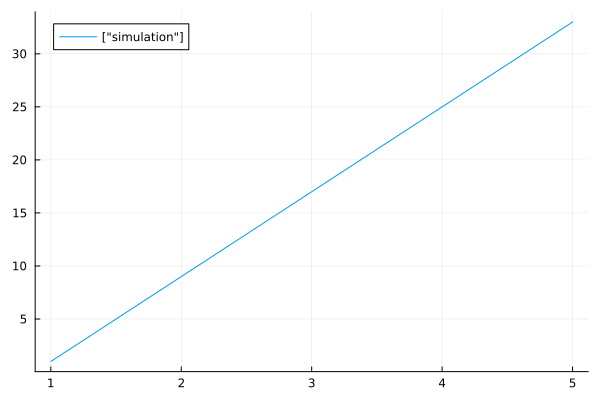

In [27]:
plot(u, y, label=["simulation"], legend=:topleft)

Another example, system with common inputs:

In [28]:
u = [MP(1:0.5:5) MP(1:0.5:5)]
y = mpsimul([S1 S2], u, true)

9×1 (max,+) dense matrix:
   1
  10
  19
  28
  37
  46
  55
  64
  73
